In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
import os

In [2]:
# set directory
path = os.getcwd()

# get dataframe
df, target, _ = utils.get_data()

In [3]:
# load model metrics
metrics_df = pd.read_csv('zero_to_one_MinMaxScaler_metrics.csv', sep=';', index_col=0)
metrics_df.sort_values('Test Score', inplace=True)
metrics_df

,Train Score,Validation Score,Test Score,Mean Absolute Error
one_layer_cnn_lstm,0.1668,0.4596,0.4079,0.5361
multi_layer_gru,0.3034,1.9756,0.6946,0.6795
multi_layer_cnn_lstm,0.2969,5.4715,2.4222,1.3312
multi_layer_cnn,0.2636,4.3427,2.8408,1.4426
one_layer_lstm,0.6842,5.8996,4.8755,2.0207
one_layer_ff,0.3858,8.3952,4.9774,1.9388
one_layer_gru,0.2955,6.6965,6.3444,2.2999
one_layer_cnn,0.6231,8.7255,9.0160,2.7434
multi_layer_lstm,0.3169,12.8169,10.4287,2.7240
multi_layer_ff,0.6550,7.8025,12.6491,3.3667


##### NOTE: At times the data set is not updated with the macroeconomic variables from the previous month, but instead with 2 months old observations. In this case, the actual number that is the aim of the prediction is already available. 


In [4]:
# load predictions
predictions_df = pd.read_csv('zero_to_one_MinMaxScaler_predictions.csv', sep=';', index_col=0)
predictions_df = predictions_df.reindex(metrics_df.index)
predictions_df

,Prediction
one_layer_cnn_lstm,6.782395
multi_layer_gru,5.361833
multi_layer_cnn_lstm,6.714418
multi_layer_cnn,6.248882
one_layer_lstm,5.650326
one_layer_ff,6.884698
one_layer_gru,5.767029
one_layer_cnn,5.851085
multi_layer_lstm,6.140616
multi_layer_ff,5.380789


In [5]:
# reindex target
new_index = pd.date_range(target.index[0], target.index[-1]+pd.Timedelta(days=31), freq='MS')
target = pd.Series(target).reindex(new_index, fill_value=np.nan)*100

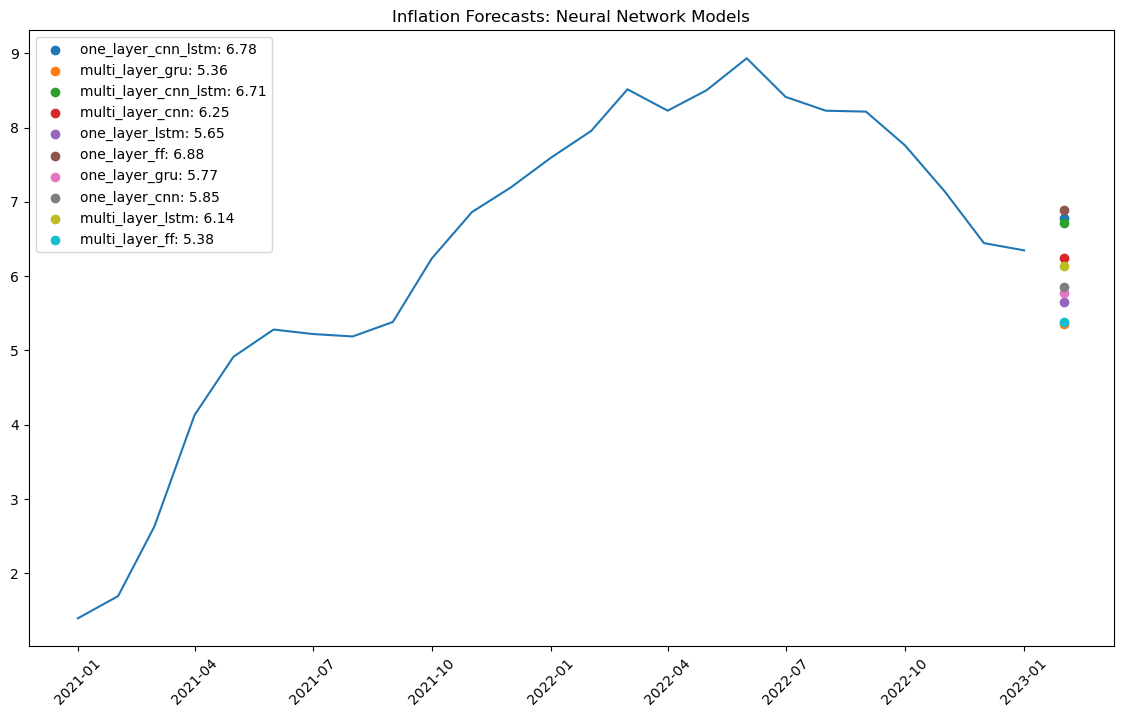

In [6]:
# plot figure with target values and predictions
fig = plt.figure(figsize=(14,8))
plt.plot(target['2021-01-01':])
plt.title('Inflation Forecasts: Neural Network Models')
for i in range(len(predictions_df)):
    plt.scatter(target.index[-1], 
                predictions_df['Prediction'][i], 
                label=f"{predictions_df.index[i]}: {round(predictions_df['Prediction'][i],2)}")
plt.xticks(rotation=45)
plt.legend()
plt.savefig("oos_predictions", dpi=fig.dpi)
plt.show()

In [7]:
# ensemble forecast of top 5 models
ensemble_forecast = predictions_df.iloc[0:5].mean()
ensemble_forecast

Prediction    6.151571
dtype: float64